In [2]:
import pandas as pd
import numpy as np
import figurefirst as fifi
import matplotlib.pyplot as plt
import fly_plot_lib.plot as fpl
import matplotlib.patches as patches

2.2.4
recommended version: 1.1.1 or greater


In [4]:
#reducing no_etoh and etoh data set to relavant trajectories
no_etoh=pd.read_csv('../trimmed_data/main/no_etoh_object.csv')
etoh=pd.read_csv('../trimmed_data/main/etoh_object.csv')


In [5]:
#include only trajectories that at some point entered the "trigger zone"
def trigger_check(df, xmin=-.3, xmax=.3, ymin=-.075, ymax=.075, zmin=.15, zmax=.25):
    d =df[df['x'].between(xmin, xmax)]
    d=d[d['y'].between(ymin, ymax)]
    d=d[d['z'].between(zmin, zmax)]
    traj_vec=d['obj_id'].unique()
    final =df[df['obj_id'].isin(traj_vec)]
    return final


In [5]:
etoh=trigger_check(etoh)
no_etoh=trigger_check(no_etoh)

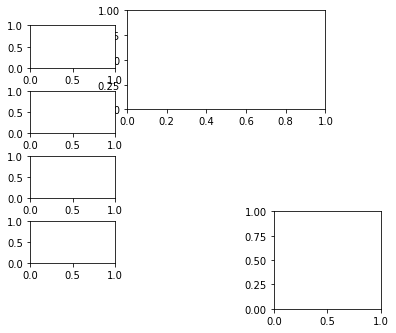

In [3]:
template = '../figure_first_templates/f1_part2.svg'
layout =fifi.svg_to_axes.FigureLayout(template, autogenlayers=True, make_mplfigures=True, hide_layers=[])

In [7]:
fs=8

In [8]:
ax=layout.axes[('object_approach', 'traj')]

In [6]:
traj_df =pd.read_csv("../trajectories_for_figures/object1.csv")
traj2=pd.read_csv('../trajectories_for_figures/object2.csv')
traj3=pd.read_csv("../trajectories_for_figures/object3.csv")

In [10]:
pre=traj_df[traj_df['time stamp'].between(-300, 0)]
dur= traj_df[traj_df['time stamp'].between(0, 675)]
post=traj_df[traj_df['time stamp'].between(675, 5000)]
pre2=traj2[traj2['time stamp'].between(-300, 0)]
dur2= traj2[traj2['time stamp'].between(0, 675)]
post2=traj2[traj2['time stamp'].between(675, 3000)]
pre3=traj3[traj3['time stamp'].between(-300, 0)]
dur3= traj3[traj3['time stamp'].between(0, 675)]
post3=traj3[traj3['time stamp'].between(675, 5000)]



In [11]:
ax.plot(pre['x'], pre['z'], color = 'k', linewidth =.75)
ax.plot(dur['x'], dur['z'], color = 'red', linewidth = .75)
ax.plot(post['x'], post['z'], color = 'k', linewidth = .75)
ax.plot(pre2['x'], pre2['z'], color = 'k', linewidth =.75)
ax.plot(dur2['x'], dur2['z'], color = 'red', linewidth = .75)
ax.plot(post2['x'], post2['z'], color = 'k', linewidth = .75)
ax.plot(pre3['x'], pre3['z'], color = 'k', linewidth =.75)
ax.plot(dur3['x'], dur3['z'], color = 'red', linewidth = .75)
ax.plot(post3['x'], post3['z'], color = 'k', linewidth = .75)

ax.set_xlim(-.5, .5)
ax.set_ylim(0, .5)
ax.set_xticks([])
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
fifi.mpl_functions.set_fontsize(ax, fs)

In [12]:
#Add trigger zone rectangle
rect = patches.Rectangle((-.3, .15), .6, .1, linewidth=1, edgecolor='#301934', facecolor='none', linestyle = "dashed")
arc=patches.Arc(xy=(.15, 0), height=.2, width=.2, angle = 180, edgecolor = '#CC5500', facecolor='none', linestyle = "dashed")
# Add the patch to the Axes
ax.add_patch(rect)
ax.add_patch(arc)

In [184]:
#####IF YOURE READING THIS THE FiFi LABELS DON"T MAKE SENSE THIS WAS EASIER THAN REORDERING EVERYTHING AND I AM BUT A TIRED POSTDOC

In [13]:
ax=layout.axes[('object_approach', 'etoh')]

In [14]:
flash =pd.read_csv("../trimmed_data/main/flash_object_approach.csv')

In [17]:
cmap_reversed = plt.cm.get_cmap('Reds')

ax.set_ylim(0, .5)
a = np.arange(-.5,.5,.002)
b = np.linspace(0, .5, 200)
x = np.arange(-.5,.502, .002)
y = np.linspace(0, .5, 201)

bin_values,_,__ = np.histogram2d(flash['x'], flash['z'],  bins =(x, y))
newdf = pd.DataFrame(bin_values.T, columns=a, index=b)
sumz = newdf.sum(axis=0)
newdf_normed= newdf
for i in range(0,len(sumz)):
    newdf_normed.iloc[:,i] = newdf.iloc[:,i]/len(flash)
X,Y = np.meshgrid(x,y)

ax.set_title("Orco>CsChrimson Flash")

ax.pcolormesh(X, Y, newdf_normed, vmin=0, vmax=0.0001, cmap='Reds', shading='flat', rasterized=True)





ax.set_xticks([])
ax.set_yticks([])
ax.tick_params(left = False, bottom = False)

fifi.mpl_functions.set_fontsize(ax, fs)
ax.set_ylim(0, .5)

(0, 0.5)

In [18]:
#actually orco shams not clean air, switched labels
ax=layout.axes[('object_approach', 'no_etoh')]

In [19]:
sham=pd.read_csv("../trimmed_data/main/sham_object_approach.csv")

In [20]:
cmap_reversed = plt.cm.get_cmap('bone_r')


a = np.arange(-.5,.5,.002)
b = np.linspace(0, .5, 200)
x = np.arange(-.5,.502, .002)
y = np.linspace(0, .5, 201)
bin_values,_,__ = np.histogram2d(sham['x'], sham['z'],  bins =(x, y))
newdf = pd.DataFrame(bin_values.T, columns=a, index=b)
sumz = newdf.sum(axis=0)
newdf_normed= newdf
for i in range(0,len(sumz)):
    newdf_normed.iloc[:,i] = newdf.iloc[:,i]/len(sham)
X,Y = np.meshgrid(x,y)

ax.pcolormesh(X, Y, newdf_normed, vmin=0, vmax=0.0001, cmap='bone_r', shading='flat', rasterized=True)
ax.set_xticks([])
ax.set_yticks([])
ax.tick_params(left = False, bottom = False)

fifi.mpl_functions.set_fontsize(ax, fs)



In [21]:
ax=layout.axes[('object_approach', 'flash')]

In [22]:
#cutting out funny business from flies that land on the roof or the floor
etoh=etoh[etoh['x'].between(-.5, .5)]
etoh=etoh[etoh['y'].between(-.25,.25)]
etoh=etoh[etoh['z'].between(0, .47)]

no_etoh=no_etoh[no_etoh['x'].between(-.5, .5)]
no_etoh=no_etoh[no_etoh['y'].between(-.25,.25)]
no_etoh=no_etoh[no_etoh['z'].between(0, .47)]


In [23]:
cmap_reversed = plt.cm.get_cmap('bone_r')

a = np.arange(-.5,.5,.0025)
b = np.linspace(0, .5, 200)
x = np.arange(-.5,.5025, .0025)
y = np.linspace(0, .5, 201)

bin_values,_,__ = np.histogram2d(etoh['x'], etoh['z'],  bins =(x, y))
newdf = pd.DataFrame(bin_values.T, columns=a, index=b)
sumz = newdf.sum(axis=0)
newdf_normed= newdf

for i in range(0,len(sumz)):
    newdf_normed.iloc[:,i] = newdf.iloc[:,i]/len(etoh)
X,Y = np.meshgrid(x,y)
#ax.set_title("Ethanol Plume + Object")

ax.pcolormesh(X, Y, newdf_normed, vmin=0, vmax=0.0001, cmap='bone_r', shading='flat', rasterized=True)
ax.set_xticks([])
ax.set_yticks([])
ax.tick_params(left = False, bottom = False)
ax.set_xlim(-.5, .5)
ax.set_ylim(0, .5)

fifi.mpl_functions.set_fontsize(ax, fs)



In [24]:
ax=layout.axes[('object_approach', 'sham')]

In [26]:
cmap_reversed = plt.cm.get_cmap('bone_r')

a = np.arange(-.5,.5,.002)
b = np.linspace(0, .5, 200)
x = np.arange(-.5,.502, .002)
y = np.linspace(0, .5, 201)
bin_values,_,__ = np.histogram2d(no_etoh['x'], no_etoh['z'],  bins =(x, y))
newdf = pd.DataFrame(bin_values.T, columns=a, index=b)
sumz = newdf.sum(axis=0)
newdf_normed= newdf
for i in range(0,len(sumz)):
    newdf_normed.iloc[:,i] = newdf.iloc[:,i]/len(no_etoh)
X,Y = np.meshgrid(x,y)

ax.pcolormesh(X, Y, newdf_normed, vmin=0, vmax=0.0001, cmap='bone_r', shading='flat', rasterized=True)

ax.set_yticks([])
ax.tick_params(left = False, bottom = False)
ax.set_xlim()
ax.set_ylim()
#ax.set_title("No Ethanol + Object")

fifi.mpl_functions.set_fontsize(ax, fs)



In [27]:
ax=layout.axes[('object_approach', 'summary')]

In [28]:
ordo=[0, 1, 2, 3]
means =[.322155,.221, .515, .1939 ]
cis=[.0268, .027, .046, .037,]
labs = ["Flashes","Shams", 'EtOH + Object', "Object Only"]
colors = ['blue', 'gray', 'red', 'gray']

In [29]:
# plot all the scatter boxes
for i in range(len(ordo)):
    u=ordo[i]+.2
    l=ordo[i]-.2
    m=means[i]
    ax.plot([l+.031, u-.031],[m, m], color = colors[i] )
    ax.fill_between([l, u], [m+cis[i], m+cis[i]], [m-cis[i], m-cis[i]], color = colors[i], alpha = 0.2, linewidth =0)

ax.spines['right'].set_visible(False)
ax.spines['top']. set_visible(False)
ax.set_xticklabels([])

ax.set_ylim(0, .8)
fifi.mpl_functions.adjust_spines(ax,['bottom', 'left'], xticks =[0, 1, 2, 3], yticks=[0, .8],  tick_length=3, linewidth=.75)
fifi.mpl_functions.set_fontsize(ax, fs)

In [30]:
layout.append_figure_to_layer(layout.figures['object_approach'], 'object_approach', cleartarget=True)

In [31]:
layout.write_svg(temlpate)

In [204]:
def check_zone_probability(df, zone_x=.15, zone_y=0., zone_z=0., radius=.1, id_key='obj_id_unique'):
    total_traj =len(df[id_key].unique())
    df['distance']=((df['x']-zone_x)**2 +(df['y']-zone_y)**2+(df['z']-zone_z)**2)**0.5
    d=df[df['distance']<radius]
    in_traj =len(d[id_key].unique())
    return float(in_traj)/total_traj

In [ ]:
#Calculate 95% confidence interval of bernoulli distribution via p+/- 1.96*sqrt(p(1-p)/n) where p is success rate

In [ ]:
def bernoulli_ci(p,n):
    q=1-p
    root=p*q/n
    interval=1.96*root**0.5
    return interval
    ####Only handles 95% CI at the moment because Im lazy

In [45]:
bins = [np.array(test_vec) ]
ordo=[0, 1, 2, 3]
means =[.322155, .156, .5137, .1939]
cis=[.0268, .0278, .046, .0372]
labs = ['Etoh + Object', "Object Only", "Flashes", "Shams"]
colors = ['blue', 'gray', 'red', 'gray']

In [46]:
####TEST PLOT WITH APPROACH PROBABILITY AND BERNOULLI 95% CI's

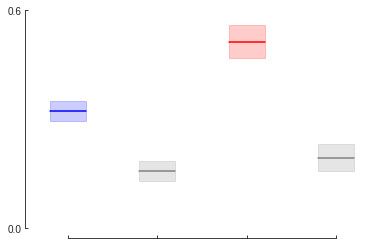

In [47]:
fig, ax = plt.subplots()
plt.style.use("seaborn-white")

for i in range(len(ordo)):
    u=ordo[i]+.2
    l=ordo[i]-.2
    m=means[i]
    ax.plot([l, u],[m, m], color = colors[i] )
    ax.fill_between([l, u], [m+cis[i], m+cis[i]], [m-cis[i], m-cis[i]], color = colors[i], alpha = 0.2)

ax.spines['right'].set_visible(False)
ax.spines['top']. set_visible(False)
ax.set_xticklabels([])
plt.xticks([0,1,2,3])
ax.set_ylim(0, .6)
fifi.mpl_functions.adjust_spines(ax,['bottom', 'left'], xticks =[0, 1, 2, 3], yticks=[0, .6],  tick_length=3, linewidth=.75)


In [49]:
def get_binomial_zscore(p1, p2, n1, n2):
    p_hat = (n1*p1+n2*p2)/(n1+n2)
    nom=p1-p2
    denom=(p_hat*(1-p_hat))*(1/n1 + 1/n2)
    root_denom =denom **0.5
    z=nom/root_denom
    return z